# Silicon Absorption for Solar Cells

In [1]:
import jax.numpy as jnp
import numpy as onp
import scipy.constants as scic

import matplotlib.pyplot as plt

from jaxlayerlumos import stackrt
from jaxlayerlumos import utils_materials
from jaxlayerlumos import utils_spectra

from jaxlayerlumos import utils_units

## Silicon absorption on PEC

Crystalline silicon is the most common material for solar cells.  In this example, we simulate 150 micron thick silicon on PEC and make a plot of the absorption spectra.

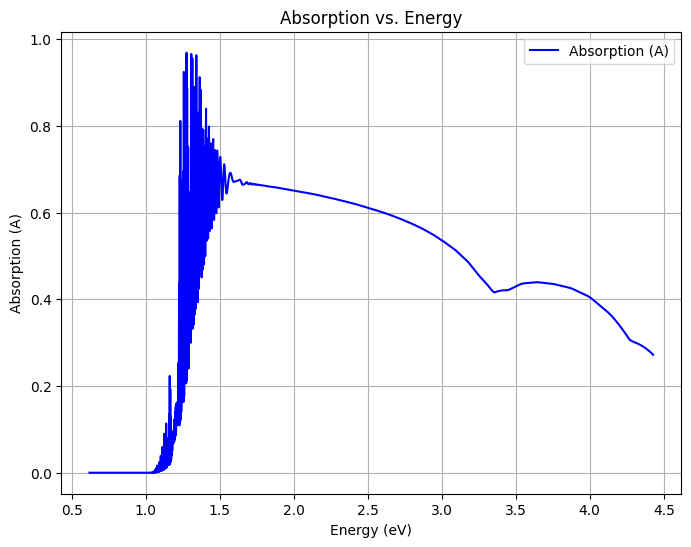

In [3]:
wavelengths = jnp.linspace(280e-9, 2000e-9, 1000)
frequencies = scic.c / wavelengths

# PEC is a perfect electrical conductor
materials = onp.array(["Air", "cSi", "PEC"])
thickness_materials = [0, 40e-6, 0]

thicknesses = jnp.array(thickness_materials)
n_k = utils_materials.get_n_k(materials, frequencies)

R_TE, T_TE, R_TM, T_TM = stackrt(n_k, thicknesses, frequencies, 0.0)

A = 1 - R_TE - T_TE
energy = utils_spectra.convert_wavelengths_to_energy(wavelengths)
plt.figure(figsize=(8, 6))
plt.plot(energy, A.squeeze(), label="Absorption (A)", color="b")
plt.xlabel("Energy (eV)")
plt.ylabel("Absorption (A)")
plt.title("Absorption vs. Energy")
plt.grid(True)
plt.legend()
plt.show()



## Silicon absorption on Aluminum

Here we switch the back layer to Aluminum instead of a perfect electrical conductor (PEC).  Since the Aluminum has some parasitic absorption, we must calculate the absorption in each layer

In [19]:
# PEC is a perfect electrical conductor
materials = onp.array(["Air", "cSi", "Al"])
thickness_materials = [0, 40e-6, 0]

thicknesses = jnp.array(thickness_materials)
n_k = utils_materials.get_n_k(materials, frequencies)

R_TE, T_TE, R_TM, T_TM = stackrt(n_k, thicknesses, frequencies, 0.0)



energy = utils_spectra.convert_wavelengths_to_energy(wavelengths)
plt.figure(figsize=(8, 6))
plt.plot(energy, A.squeeze(), label="Absorption (A)", color="b")
plt.xlabel("Energy (eV)")
plt.ylabel("Absorption (A)")
plt.title("Absorption vs. Energy")
plt.grid(True)
plt.legend()
plt.show()




Array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float64)